In [ ]:
### notebook for preprocessing of chicken retina SCP adata according to https://github.com/snap-stanford/UCE/issues/35

In [17]:
import scanpy as sc
import torch
import numpy as np
import os
import pandas as pd

import glob
import re

ModuleNotFoundError: No module named 'pytorch'

In [121]:
adata = sc.read_csv("UCE-postgithub/SCP1159/expression/Chick_retina_atlas_expression_matrix.csv").T
adata_copy = adata.copy()

In [140]:
adata = adata_copy.copy()

# Initialize the 'cell_type' column in adata.obs with 'Unknown' or NaN
adata.obs['cell_type'] = 'Unknown'

# Directory containing the txt files
directory = 'UCE-postgithub/SCP1159/cluster/'

# Get a list of all txt files in the directory
file_list = glob.glob(os.path.join(directory, '*.txt'))

# Iterate over each file
for file_path in file_list:
    # Extract the cell type name from the filename
    filename = os.path.basename(file_path)
    match = re.match(r'Chick_(.+?)_clusterfile\.txt', filename)
    if match:
        cell_type_name = match.group(1)
    else:
        print(f"Filename {filename} does not match expected pattern.")
        continue
   
    # Read the txt file; assuming tab-separated values with no header
    df = pd.read_csv(file_path, sep='\t', header=[0, 1])

    
    # The cell barcodes are in the first column
    cell_barcodes = df["NAME"].astype(str).values
    
    # Create a DataFrame for merging
    cell_type_df = pd.DataFrame({'barcode': [cell[0] for cell in cell_barcodes], 'cell_type': cell_type_name})
    mask = adata.obs.index.isin(cell_type_df["barcode"].to_list())
    adata.obs.loc[mask, "cell_type"] = cell_type_name

In [ ]:
adata.write_h5ad("scp_chicken_retina.h5ad")

5


/storage/plzen1/home/jiribruthans/.local/lib/python3.9/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


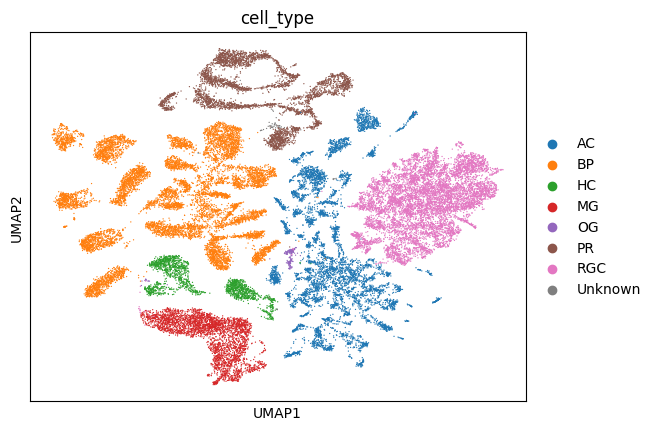

15


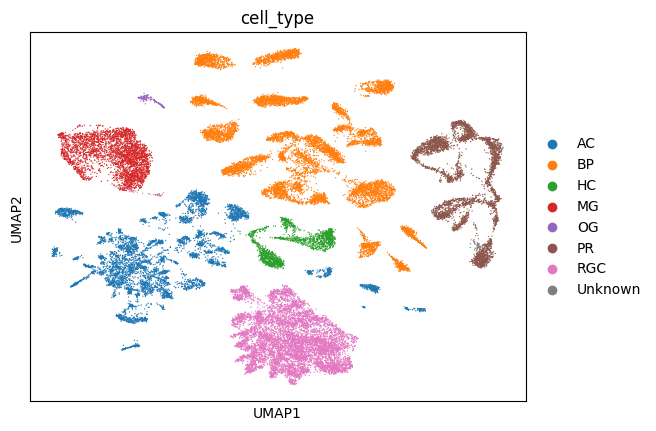

30


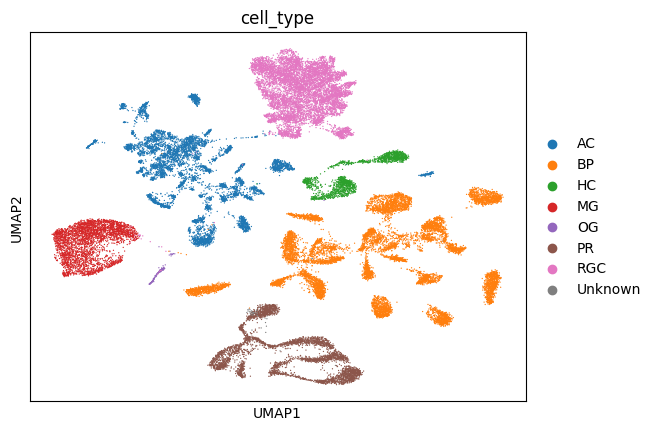

60


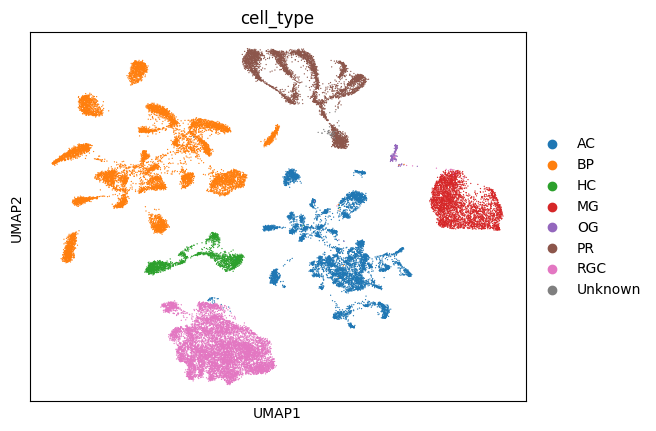

100


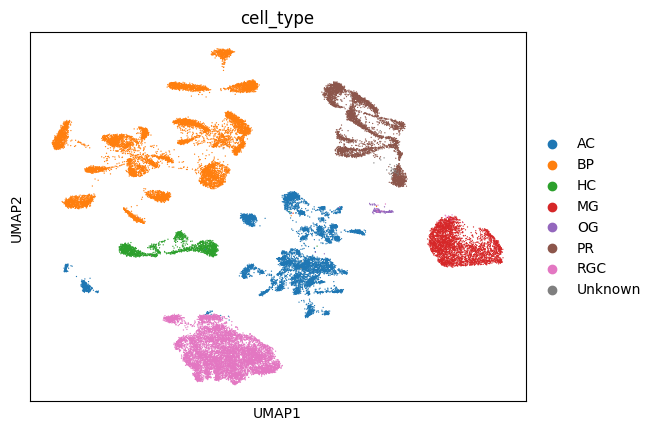

In [145]:
for i in [5, 15, 30, 60, 100]:
    print(i)
    sc.pp.neighbors(adata, n_neighbors=i)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color="cell_type")

In [7]:
#remove genes that are not in species to chromosome

In [9]:
 bad_genes = ['TTC26', 'SON', 'FCHSD2', 'ABI1', 'MYRIP', 'PARD6G', 'EEF1D', 'EPHX1', 'FAM167A', 'SPATA5', 'JAKMIP1', 'FAM98B', 'LRRFIP1', 'SCN3A', 'RDH8', 'LEXM', 'MTERF4', 'PLEKHG4', 'WDR88', 'POC1A', 'ERGIC1', 'MEIKIN', 'TBX1', 'TLCD2', 'RPL23A', 'KCNK15', 'VDAC3', 'LYSMD1', 'RPS27', 'DBF4B', 'SNRPD2', 'POU6F1', 'UHRF2', 'SLC26A1', 'MOB3B']

In [4]:
adata = sc.read_h5ad("scp_chicken_retina.h5ad")

In [24]:
adata = adata[:, ~adata.var_names.isin(bad_genes)]

In [26]:
#save good genes retina
adata.write_h5ad("ggs_scp_chicken_retina")